In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, hamming_loss, confusion_matrix,f1_score,precision_score, log_loss, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
all_features=pd.read_csv("../content/drive/My Drive/Databases/Covid19-PreProcessed/all_features.csv")
all_features = all_features.drop(all_features.columns[0], axis=1)
all_features.head()

0         1         2  ...         250       251  252
0  127581.603922  0.486696  0.249311  ...   84.212226  0.094485  0.0
1  100292.600000  0.382592  0.241244  ...  101.395351  0.114928  0.0
2  125128.792157  0.477334  0.232200  ...   29.567456  0.095783  0.0
3  159625.976471  0.608932  0.182246  ...   59.220684  0.081454  0.0
4  141615.301961  0.540417  0.224082  ...   48.174552  0.098641  0.0

[5 rows x 253 columns]

In [ ]:
X = all_features.iloc[:, 0:-1].values
y = all_features.iloc[:, -1].values

In [ ]:
print(X.shape)
print(y.shape)

(755, 252)
(755,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
def search_for_parameters(estimator, X_data, y_data, grid_parameters, scoring='accuracy', cv=3):
    
    classes = 3
    
    # Execute Grid Search
    grid_clf = GridSearchCV(estimator=estimator, scoring=scoring,
                            param_grid=grid_parameters, iid=False,
                            cv=cv,n_jobs=-1)
    
    grid_clf.fit(X_data, y_data)

    print("The best parameters are: ", grid_clf.best_params_)

    return grid_clf.best_params_

In [ ]:
svm_clf = SVC(class_weight='balanced')

svm_params_list = {'C':[1,2,4,8], 
                   'kernel':['poly', 'rbf', 'sigmoid'], 
                   'degree':[3,4,5], 
                   'gamma':['auto','scale']}
                   
svm_parameters = search_for_parameters(estimator=svm_clf, 
                                X_data=X_train, 
                                y_data=y_train, cv=5,
                                grid_parameters=svm_params_list)

svm_clf.set_params(**svm_parameters)

svm_clf.fit(X_train, y_train)

The best parameters are:  {'C': 8, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}


SVC(C=8, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def cross_validate(estimator, X_data, y_data, scoring='accuracy', cv=3, Z=2):
    
    classes = 3
    
    # Execute Cross Validation
    scores = cross_val_score(estimator=estimator, X=X_data, y=y_data, cv=cv, scoring=scoring)

    print("Model Scoring Evaluation Results")
    print("The mean score and the confidence interval of the score estimate are:")
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * Z))

cross_validate(estimator=svm_clf, X_data=X_train, y_data=y_train, cv=5)

Model Scoring Evaluation Results
The mean score and the confidence interval of the score estimate are:
Accuracy: 0.91 (+/- 0.04)


In [ ]:
y_true, y_pred = y_test, svm_clf.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Hamming Loss:",hamming_loss(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))
print()
print("*"*50)
print()
print("\t\t\tClassification Report")
print()
print(classification_report(y_true, y_pred))
print("*"*50)
print("Confusion Matrix \n:", confusion_matrix(y_true,y_pred))

Accuracy: 0.9205298013245033
Hamming Loss: 0.07947019867549669
F1 Score: 0.9205298013245033
Precision Score :  0.9205298013245033
Recall Score :  0.9205298013245033

**************************************************

			Classification Report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.95      0.90      0.92        77
         2.0       0.88      0.94      0.91        63

    accuracy                           0.92       151
   macro avg       0.94      0.94      0.94       151
weighted avg       0.92      0.92      0.92       151

**************************************************
Confusion Matrix 
: [[11  0  0]
 [ 0 69  8]
 [ 0  4 59]]


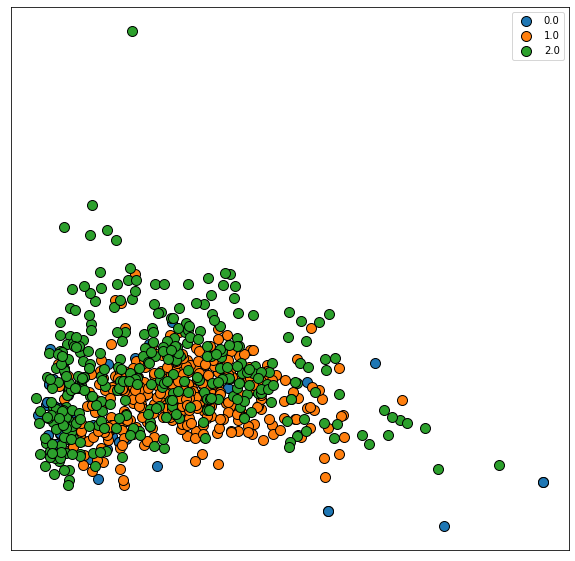

In [ ]:
def plot_pca_data(X, y):    
    
    LE = LabelEncoder()
    y_encoded = LE.fit_transform(y)
    
    pca = PCA(n_components=2)
    pca.fit(X)
    pca_X = pca.transform(X)

    x_axis = pca_X[:,0]
    y_axis = pca_X[:,1]

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    for label in np.unique(y):
        ax.scatter(pca_X[y==label, 0],
                   pca_X[y==label, 1], 
                   label=label,
                   s=100,
                   edgecolor='k')
        

    ax.legend()
    plt.xticks([])
    plt.yticks([])

plot_pca_data(X, y)

In [ ]:
from sklearn.preprocessing import label_binarize
y_binarize = label_binarize(y, classes=[0, 1, 2])
n_classes = y_binarize.shape[1]
n_classes
y_score = svm_clf.fit(X_train, y_train).decision_function(X_test)

In [ ]:
y_test.shape
y_test = np.reshape(y_test,(1, y_test.size))

In [ ]:
y_pred = np.reshape(y_pred,(1, y_pred.size))

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_dummies.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

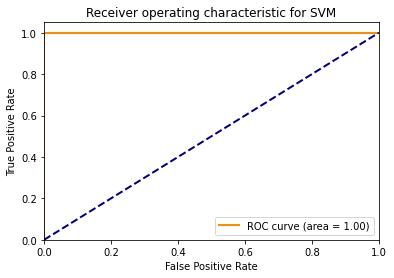

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM')
plt.legend(loc="lower right")
plt.show()

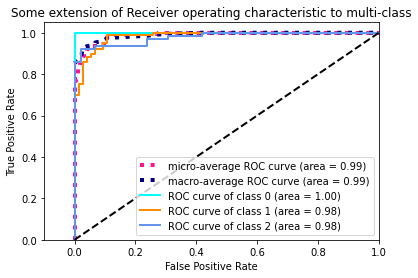

In [ ]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

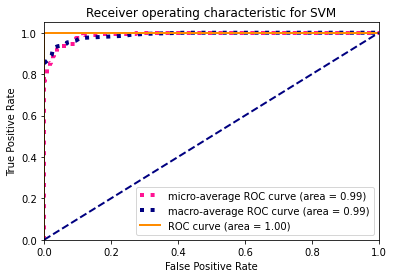

In [ ]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM')
plt.legend(loc="lower right")
plt.show()